In [2]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_level, exciton_sim_4_lvl_full_exchange

Loading BokehJS ...

In [3]:
k_er_per_s = 2e10  # constant for radiativ decay from S11
k_br_per_s = 2e10  # constant for radiativ decay from S11*
k_enr_per_s = 1e10  # constant of non-radiativ decay from S11
k_bnr_per_s = 1e10  # constant for non-radiativ decay from S11*

k_de_per_s = 1e09  # constant for going from dark to S11 state
k_ed_per_s = 1e11  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))

k_dnr_per_s = 0

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s,
                        k_ed_per_s, k_de_per_s, k_dnr_per_s])

In [3]:
exc_sim_len_1 = CNTSimFile('../sim_output/2020-05-10_exciton_sim_4_level-len_1.h5', kin_const_1)

Existing file loaded successfully.


../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


In [4]:
exc_sim_len_1.notebook_output = True

In [5]:
n_defects = [0, 20]
CNT_length = [30, 60, 90, 120, 150, 200, 300, 500, 800, 1200]

In [14]:
exc_sim_len_1.length_dependance(10000, exciton_sim_4_level, CNT_length, 1e10,
                                {'t_step': 1, 'r_exc_nm': 2})

start of calculation: 2020-05-09 23:29:19.917854
start of exiton simulation: 2020-05-09 23:29:19.918199


Text(value='')

2020-05-09 23:29:19.945773
elapsed time: 00:00:00
exciton processed((0/ 10))
start of exiton simulation: 2020-05-09 23:29:19.946404


Text(value='')

2020-05-09 23:29:33.483035
elapsed time: 00:00:13
exciton processed((1/ 10))
start of exiton simulation: 2020-05-09 23:29:33.483661


Text(value='')

2020-05-09 23:29:46.579225
elapsed time: 00:00:13
exciton processed((2/ 10))
start of exiton simulation: 2020-05-09 23:29:46.579623


Text(value='')

2020-05-09 23:30:00.108714
elapsed time: 00:00:13
exciton processed((3/ 10))
start of exiton simulation: 2020-05-09 23:30:00.109030


Text(value='')

2020-05-09 23:30:14.200568
elapsed time: 00:00:14
exciton processed((4/ 10))
start of exiton simulation: 2020-05-09 23:30:14.201282


Text(value='')

2020-05-09 23:30:28.084342
elapsed time: 00:00:13
exciton processed((5/ 10))
start of exiton simulation: 2020-05-09 23:30:28.088276


Text(value='')

2020-05-09 23:31:13.526307
elapsed time: 00:00:15
exciton processed((8/ 10))
start of exiton simulation: 2020-05-09 23:31:13.526703


Text(value='')

2020-05-09 23:31:31.616745
elapsed time: 00:00:18
exciton processed((9/ 10))
start of exiton simulation: 2020-05-09 23:31:31.617322


Text(value='')

2020-05-09 23:31:51.446333
elapsed time: 00:00:19
2020-05-09 23:31:51.446804
elapsed time: 00:02:31


In [15]:
exc_sim_len_1.save()

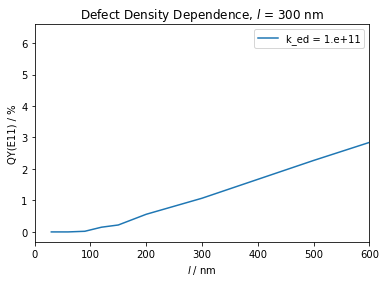

In [21]:
plt.plot(exc_sim_len_1.calc_dict['CNT_length'], exc_sim_len_1.QY[:, 1]*100,
              label=f'k_ed = {np.format_float_scientific(exc_sim_len_1.kin_const[5])}',)
plt.legend()
plt.xlim(0, 600)
plt.xlabel('$l$ / nm')
plt.ylabel('QY(E11) / %')
plt.title('pristine nanotbue, $l$ = 300 nm')
plt.savefig('../../tmp/2020-05-10_exciton_sim_4_level-QY-E11-pristine.png', dpi=500)

# Modified on 2020-05-11

In [4]:
k_r_list = [2e10, 1.5e10, 1e10, 9.5e9]

In [5]:
k_ed_list = [5e10, 4e10, 3e10, 2e10]

In [6]:
n_defects = [0, 20]

In [7]:
counter = 1
for i in k_r_list:
    for j in k_ed_list:
        kin_const = np.array([i, i, k_bnr_per_s, k_enr_per_s, k_bd_per_s,
                             j, k_de_per_s, k_dnr_per_s])
        print(counter, kin_const)
        exc_sim_def = CNTSimFile(f'../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-{j}_k_r-{i}_{counter}.h5', kin_const)
        exc_sim_def.notebook_output = True
        exc_sim_def.defect_dependance(50000, exciton_sim_4_level, n_defects, {'t_step': 1, 'CNT_length': 300,
                                                                     'r_exc_nm': 2})
        exc_sim_def.save()
        counter +=1

1 [2.00000000e+10 2.00000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 5.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 08:55:20.327347
start of exiton simulation: 2020-05-11 08:55:20.328098


Text(value='')

2020-05-11 08:55:20.358109
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 08:55:20.359678


Text(value='')

2020-05-11 08:56:45.190829
elapsed time: 00:01:24
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 08:56:45.192033


Text(value='')

2020-05-11 08:58:19.420847
elapsed time: 00:01:34
2020-05-11 08:58:19.421532
elapsed time: 00:02:59
2 [2.00000000e+10 2.00000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 4.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 08:58:19.468170
start of exiton simulation: 2020-05-11 08:58:19.468414


Text(value='')

2020-05-11 08:58:19.509567
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 08:58:19.509996


Text(value='')

2020-05-11 09:01:16.236222
elapsed time: 00:01:37
2020-05-11 09:01:16.236651
elapsed time: 00:02:56
3 [2.00000000e+10 2.00000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 3.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:01:16.296428
start of exiton simulation: 2020-05-11 09:01:16.297102


Text(value='')

2020-05-11 09:01:16.319491
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:01:16.320762


Text(value='')

2020-05-11 09:07:00.750872
elapsed time: 00:01:30
2020-05-11 09:07:00.762692
elapsed time: 00:02:49
5 [1.50000000e+10 1.50000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 5.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:07:00.810499
start of exiton simulation: 2020-05-11 09:07:00.810732


Text(value='')

2020-05-11 09:07:00.909865
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:07:00.910326


Text(value='')

2020-05-11 09:08:19.882618
elapsed time: 00:01:18
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:08:19.883164


Text(value='')

2020-05-11 09:09:55.194898
elapsed time: 00:01:35
2020-05-11 09:09:55.195322
elapsed time: 00:02:54
6 [1.50000000e+10 1.50000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 4.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:09:55.243903
start of exiton simulation: 2020-05-11 09:09:55.244131


Text(value='')

2020-05-11 09:09:55.327435
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:09:55.327710


Text(value='')

2020-05-11 09:12:49.811076
elapsed time: 00:01:35
2020-05-11 09:12:49.811774
elapsed time: 00:02:54
7 [1.50000000e+10 1.50000000e+10 1.00000000e+10 1.00000000e+10
 1.74039741e+09 3.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:12:49.879242
start of exiton simulation: 2020-05-11 09:12:49.879433


Text(value='')

2020-05-11 09:12:49.987364
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:12:49.987730


Text(value='')

2020-05-11 09:14:08.430625
elapsed time: 00:01:18
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:14:08.431425


Text(value='')

2020-05-11 09:25:58.467898
elapsed time: 00:01:26
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:25:58.468473


Text(value='')

2020-05-11 09:28:54.279931
elapsed time: 00:01:19
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:28:54.280436


Text(value='')

2020-05-11 09:30:27.904801
elapsed time: 00:01:33
2020-05-11 09:30:27.905395
elapsed time: 00:02:53
13 [9.50000000e+09 9.50000000e+09 1.00000000e+10 1.00000000e+10
 1.74039741e+09 5.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:30:28.054798
start of exiton simulation: 2020-05-11 09:30:28.055464


Text(value='')

2020-05-11 09:30:28.080556
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:30:28.081357


Text(value='')

2020-05-11 09:31:47.292160
elapsed time: 00:01:19
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:31:47.293246


Text(value='')

2020-05-11 09:33:25.210009
elapsed time: 00:01:37
2020-05-11 09:33:25.211605
elapsed time: 00:02:57
14 [9.50000000e+09 9.50000000e+09 1.00000000e+10 1.00000000e+10
 1.74039741e+09 4.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:33:25.566060
start of exiton simulation: 2020-05-11 09:33:25.566676


Text(value='')

2020-05-11 09:33:25.588584
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:33:25.589827


Text(value='')

2020-05-11 09:34:45.698675
elapsed time: 00:01:20
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:34:45.699370


Text(value='')

2020-05-11 09:36:22.059075
elapsed time: 00:01:36
2020-05-11 09:36:22.059701
elapsed time: 00:02:56
15 [9.50000000e+09 9.50000000e+09 1.00000000e+10 1.00000000e+10
 1.74039741e+09 3.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:36:22.104539
start of exiton simulation: 2020-05-11 09:36:22.104763


Text(value='')

2020-05-11 09:36:22.177208
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:36:22.177814


Text(value='')

2020-05-11 09:37:41.947860
elapsed time: 00:01:19
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:37:41.948217


Text(value='')

2020-05-11 09:39:15.815732
elapsed time: 00:01:33
2020-05-11 09:39:15.816273
elapsed time: 00:02:53
16 [9.50000000e+09 9.50000000e+09 1.00000000e+10 1.00000000e+10
 1.74039741e+09 2.00000000e+10 1.00000000e+09 0.00000000e+00]
start of calculation: 2020-05-11 09:39:15.858207
start of exiton simulation: 2020-05-11 09:39:15.858416


Text(value='')

2020-05-11 09:39:15.914295
elapsed time: 00:00:00
exciton processed((0/ 2))
start of exiton simulation: 2020-05-11 09:39:15.914649


Text(value='')

2020-05-11 09:40:34.300474
elapsed time: 00:01:18
exciton processed((1/ 2))
start of exiton simulation: 2020-05-11 09:40:34.300846


Text(value='')

2020-05-11 09:42:05.725593
elapsed time: 00:01:31
2020-05-11 09:42:05.726183
elapsed time: 00:02:49
